<a href="https://colab.research.google.com/github/kogen15923/ml-book-3rd-impl/blob/main/ch03/How_To_Use_The_Scikit_Learn_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn利用したパーセプトロン訓練

In [ ]:
# データの導入

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
# scikit-learnのmodel_selectionモジュールのtrain_test_split関数を用いたデータの分割
#
from sklearn.model_selection import train_test_split
# stratifyは層化サンプリング(母集団のデータ比率に合わせる)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [ ]:
# numpyのbincount関数を用いた層化サンプリング効果検証
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [ ]:
# 標準化のためのStandardScalerモジュール
from sklearn.preprocessing import StandardScaler
#インスタンス化
sc = StandardScaler()
# X_trainの標準化パラメータ(μ平均とσ標準偏差)を推定
sc.fit(X_train)
# 訓練データとテストデータ両方に適用(値比較できるように)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('Shape of X_train_std before subsetting:', X_train_std.shape)
print('Shape of y_train before subsetting:', y_train.shape)

Shape of X_train_std before subsetting: (105, 2)
Shape of y_train before subsetting: (105,)


In [ ]:
# 3クラスのOvR手法を用いたパーセプトロンのフィット

from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
# 予測
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [ ]:
# scikit-learnのmetricsモジュールaccuracy_score関数を用いた正解率
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [ ]:
# 分類器に定義されているscoreモジュールを用いた正解率
print('Accurary: %.3f' % ppn.score(X_test_std, y_test))

Accurary: 0.978


In [ ]:
# 三次元データの決定境界の可視化

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # 目的変数を一意に指定

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

  # テストデータ点を目立たせる
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')

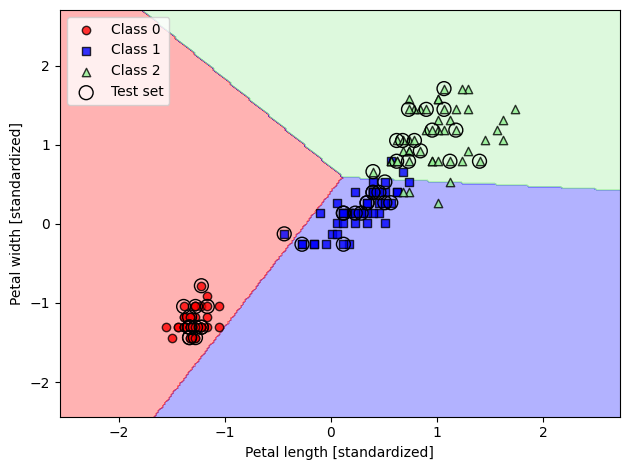

In [ ]:
# グラフの表示

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# ロジスティック回帰

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2721101684.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(z)$')


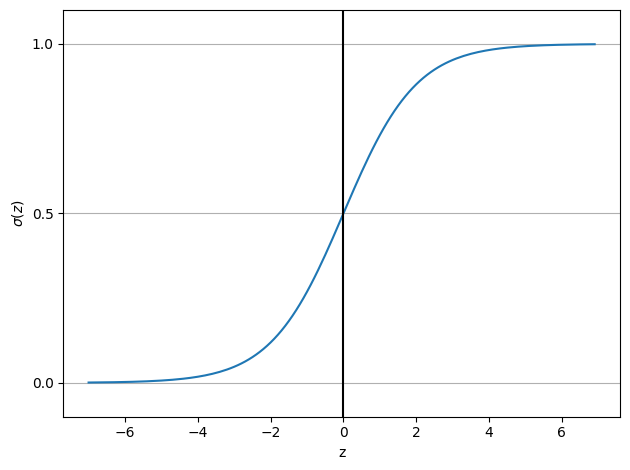

In [ ]:
# シグモイド関数(-7 <= z <= 7)のグラフのプロット

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4036954699.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$(z)')


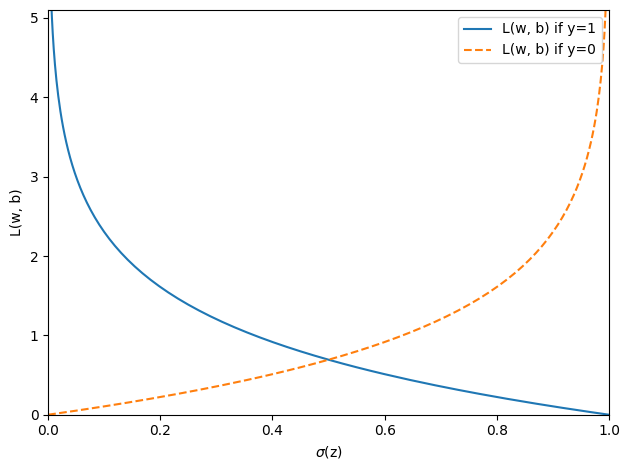

In [ ]:
# 正解ラベル別予測結果対損失関数のグラフのプロット

def loss_1(z):
  return - np.log(sigmoid(z))

def loss_0(z):
  return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]

plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma$(z)')
plt.ylabel('L(w, b)')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# ロジスティック回帰のフルバッチ勾配降下法の実装
# ADALINE実装の損失関数と活性化関数を変更すれば良い
class LogisticRegressionGD:
  '''
  <パラメータ>
  eta: 学習率 (float) (0.0 < eta <= 1.0)
  n_iter: エポック (int)
  random_state: 乱数シード (int)
  X: 訓練データ, shape = [n_samples, n_features]
  (n_samples: サンプル数, n_features: 特徴量数)
  y: 目的変数, shape = [n_samples]

  <属性>
  w_: 適合後の重み (1次元配列)
  b_: 適合後のバイアス (スカラー)
  losses_: エポックごとの誤差の総和 (リスト)
  '''
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float64(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      # ロジスティック損失関数に変更
      loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  def activation(self, z):
    # シグモイド活性化関数に変更
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

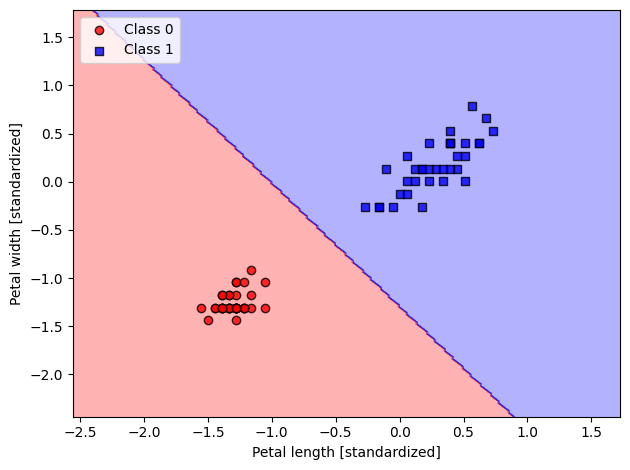

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

路地ステイック回帰のソルバーについて
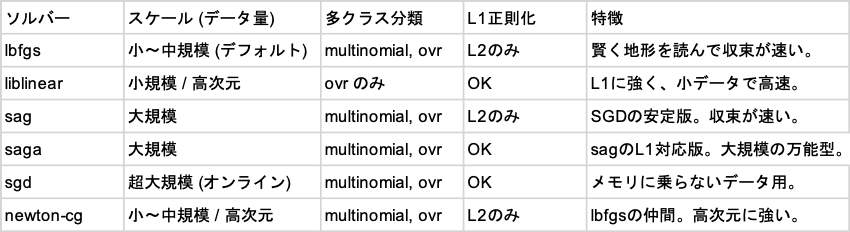

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


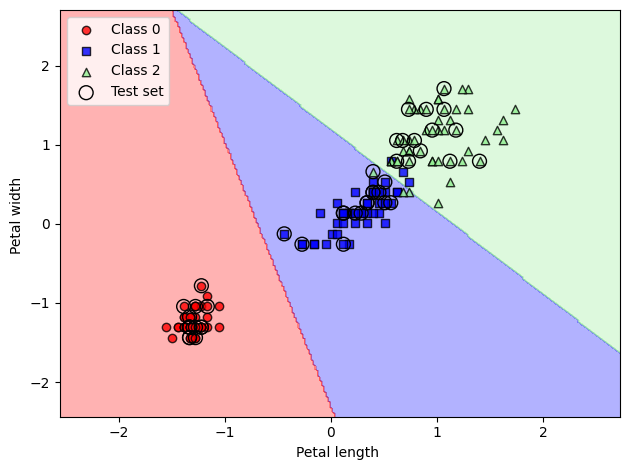

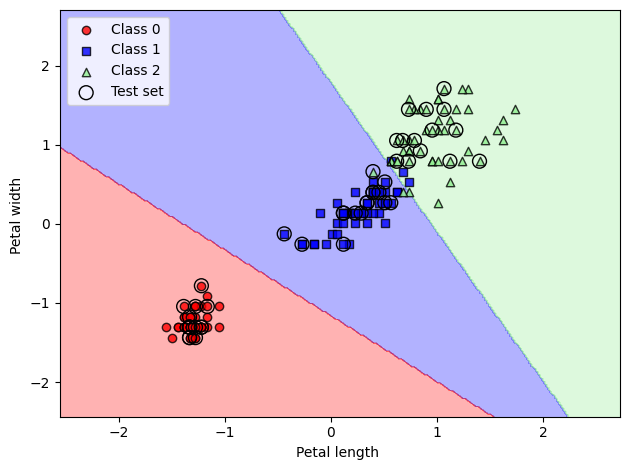

In [ ]:
# scikit-learnを用いたロジスティック回帰モデルの実装(multinomialとOvRの比較つき)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
# 実験としてmulti_class='multinomial'との比較
lr2 = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')

lr.fit(X_train_std, y_train)
lr2.fit(X_train_std, y_train)
# lrの表示
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('Petal length ')
plt.ylabel('Petal width ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# lr2の表示
plot_decision_regions(X_combined_std, y_combined, classifier=lr2, test_idx=range(105,150))
plt.xlabel('Petal length ')
plt.ylabel('Petal width ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# predict_probaメソッド(データが特定のクラスに所属する確率の予測)(合計が1になるようにソフトマックス関数後付け済み)
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [ ]:
# argmax関数で最大とればクラスラベルの予測値
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
# predictメソッドも同じことができる
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
# sckit-learnでは入力として2次元配列が期待されるのでreshapeメソッドを活用
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

# 正則化について

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

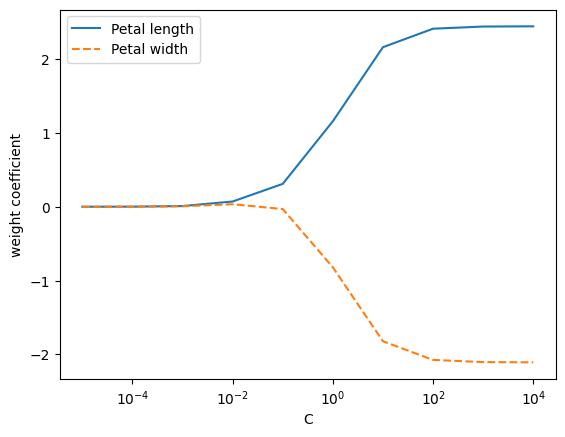

In [ ]:
# L2正則化(C)の強さの可視化
weights, params = [], []

for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# サポートベクトルマシン: サポートベクトル分類(SVM: SVC)

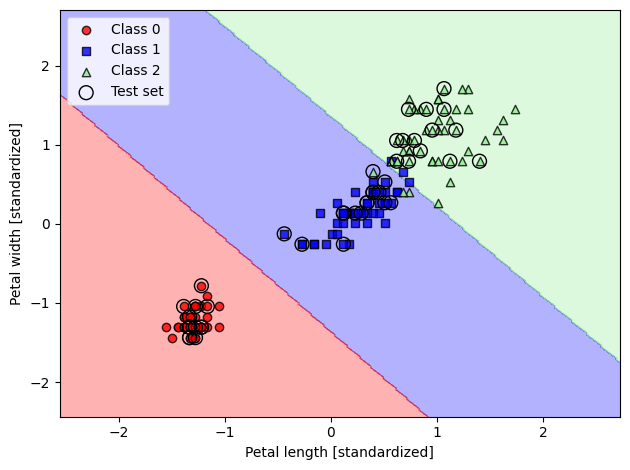

In [ ]:
# SVMモデルを用いたIrisデータセットの分類(SVC)
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# SGDを用いたパーセプトロン、ロジスティック回帰、SVMの実装
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')          # 損失関数=シグモイド
svm = SGDClassifier(loss='hinge')       # 損失関数=ヒンジ関数

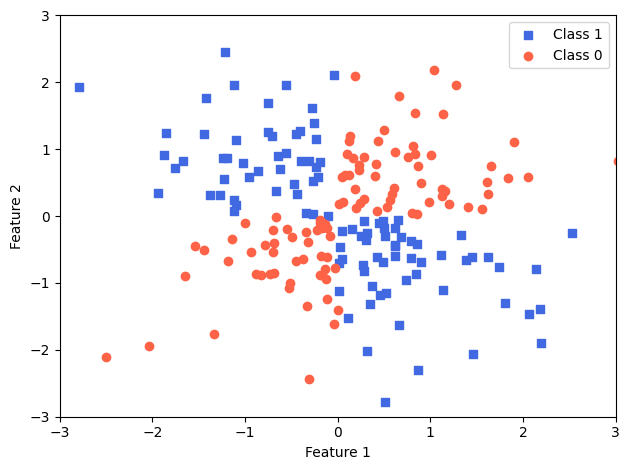

In [ ]:
# SVMの非線形問題への対処を確認
# そのためにXORゲート形式の単純データを作成
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

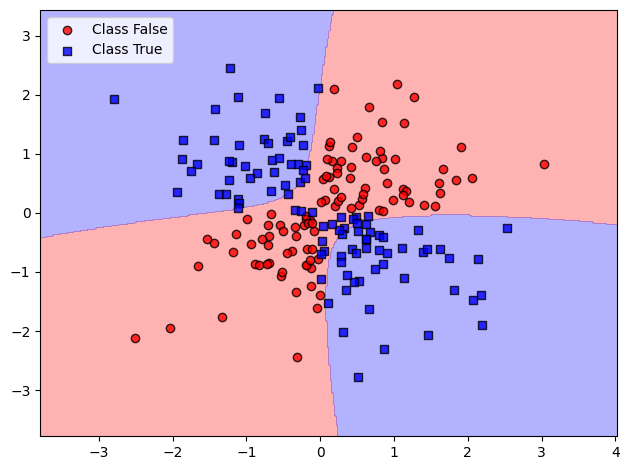

In [ ]:
# RBFカーネルによる解決
# それぞれこどなる形の'linear'(線形)、'poly(多項式カーネル)'、'sigmoid'(シグモイドカーネル)
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

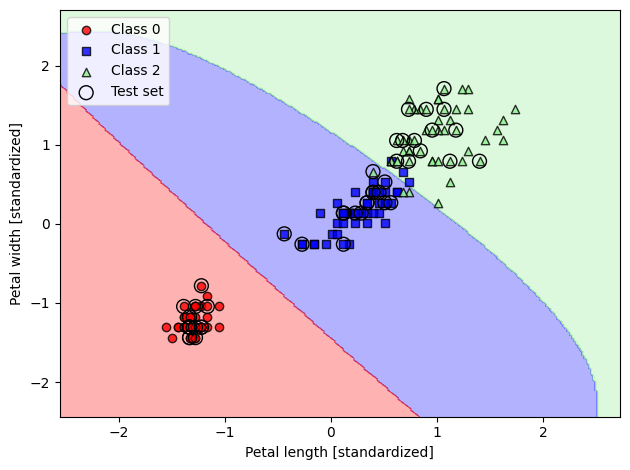

In [ ]:
# Irisを用いたγ(カットオフ)パラメータの動きの比較
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

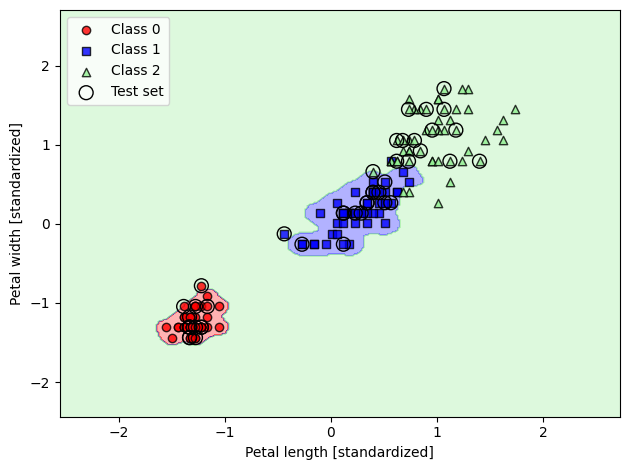

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 決定木

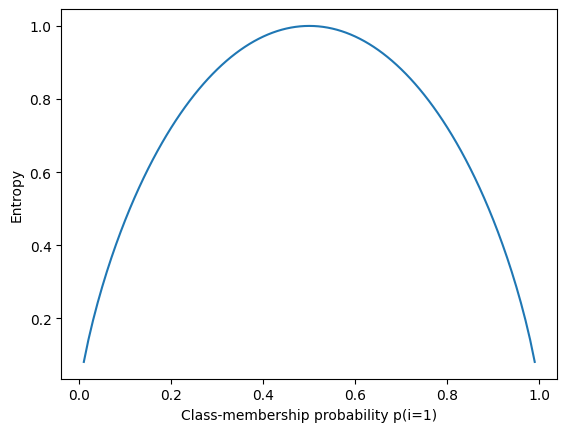

In [ ]:
# 様々なクラス分布対エントロピーグラフの可視化
def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
# 0.0から1.9まで0.01刻み
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

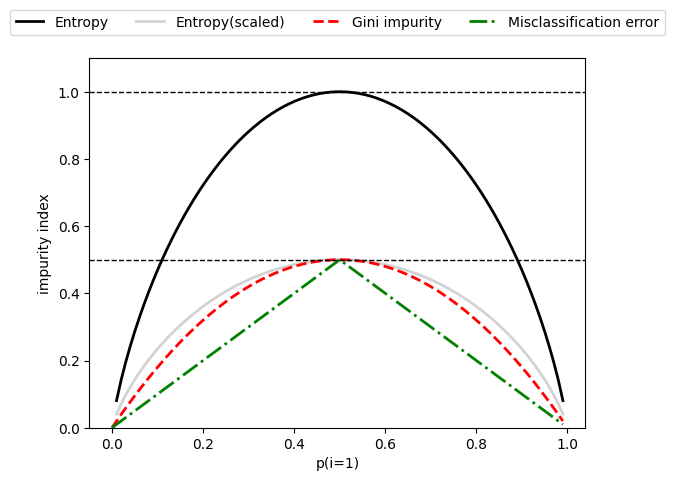

In [ ]:
# クラス1の確率対3種類不純度条件の不純度の可視化
import matplotlib.pyplot as plt
import numpy as np

# ジニ不純度
def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1-p))
# エントロピー
def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
# 分類誤差
def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy(scaled)', 'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

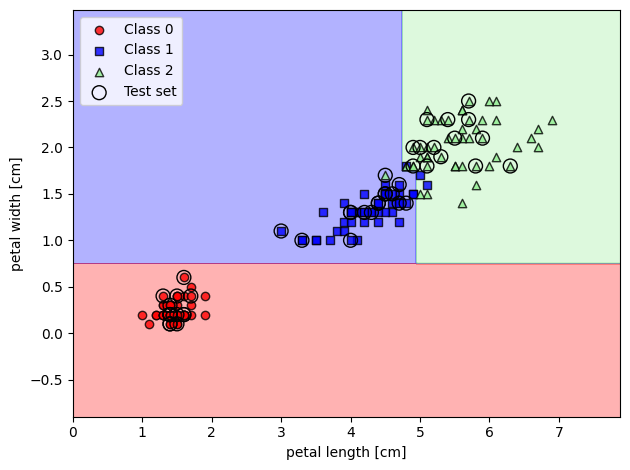

In [ ]:
# ジニ不純度を用いて深さ最大4の決定木を構築
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

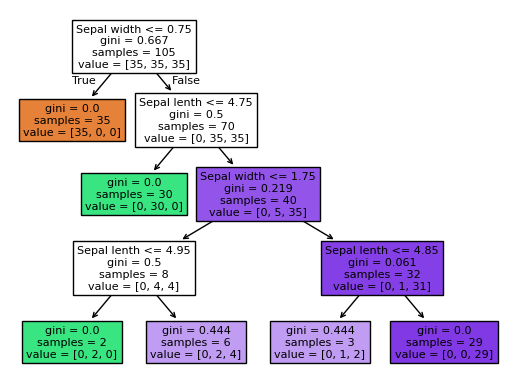

In [ ]:
# 可視化ための機能tree
from sklearn import tree

feature_names = ['Sepal lenth', 'Sepal width', 'Petal length', 'Petal width']
# filled=Trueで多数派のクラスラベルに従って色付く
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

# ランダムフォレスト

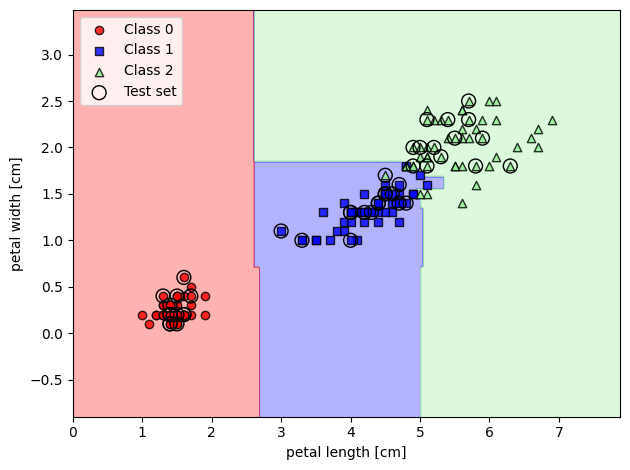

In [ ]:
# ランダムフォレストの実装
from sklearn.ensemble import RandomForestClassifier
# criterionは決定技の不純度種類（デフォはgini）、
# n_estimatorsは決定技の数、n_jobsは訓練処理時の並列化(コア数)
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# k最近傍法

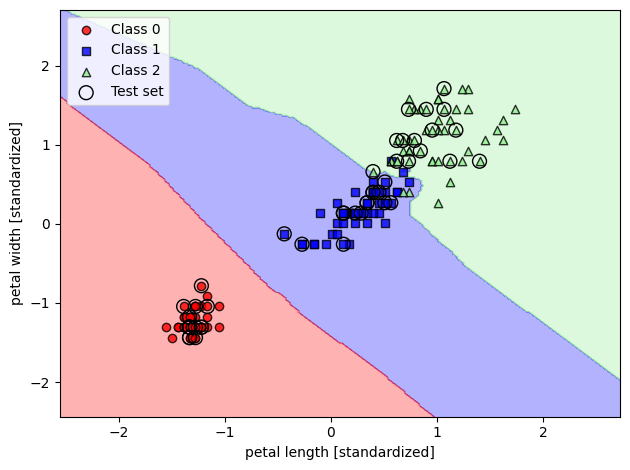

In [ ]:
# scikit-learnでユーグリッド距離のKNNの実装
from sklearn.neighbors import KNeighborsClassifier
# metric='minkowski'はユークリッド距離とマンハッタン距離二つを一般化したもの（pの値で変わる）
# p=1はマンハッタン距離、p=2はユークリッド距離
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()